In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")

### Data information
* <b>Age</b>: age of the patient [years] 
* <b>Sex</b>: sex of the patient [M: Male, F: Female] 
* <b>ChestPainType</b>: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] 
* <b>RestingBP</b>: resting blood pressure [mm Hg] 
* <b>Cholesterol</b>: serum cholesterol [mm/dl] 
* <b>FastingBS</b>: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 
* <b>RestingECG</b>: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality  (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 
* <b>MaxHR</b>: maximum heart rate achieved [Numeric value between 60 and 202] 
* <b>ExerciseAngina</b>: exercise-induced angina [Y: Yes, N: No] 
* <b>Oldpeak</b>: oldpeak = ST [Numeric value measured in depression] 
* <b>ST_Slope</b>: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] 
* <b>HeartDisease</b>: output class [1: heart disease, 0: Normal] 

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Text(0.5, 1.0, 'Age distribution')

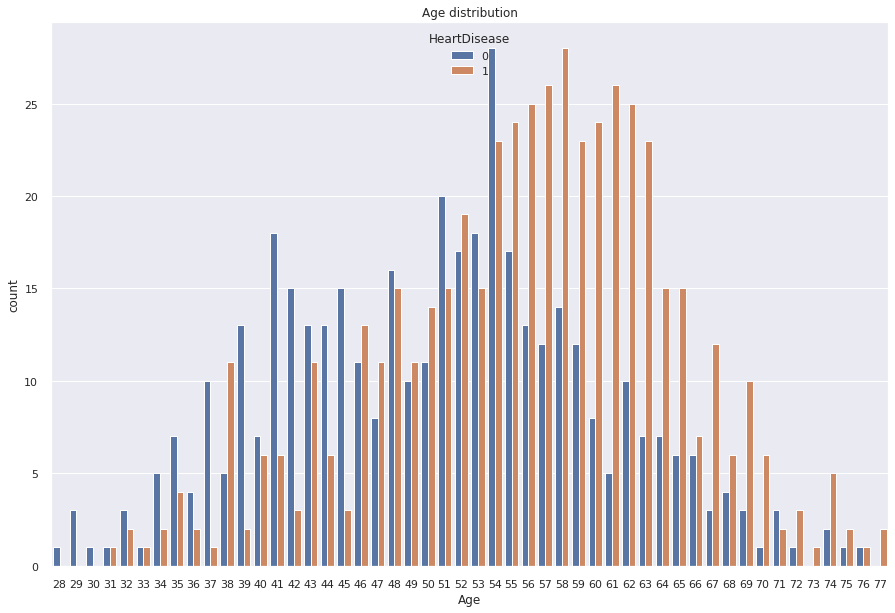

In [41]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(data=df, x ='Age', hue='HeartDisease').set_title('Age distribution')

Text(0.5, 1.0, 'Sex distribution')

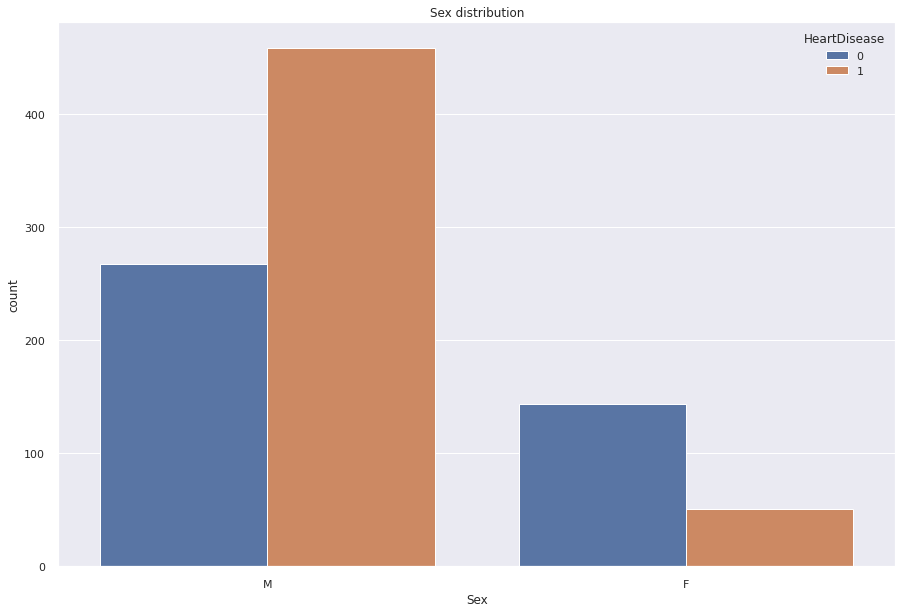

In [33]:
sns.countplot(data=df, x ='Sex', hue='HeartDisease').set_title('Sex distribution')

<b>Pain Type</b>:
* TA: Typical Angina
* ATA: Atypical Angina
* NAP: Non-Anginal Pain
* ASY: Asymptomatic

Text(0.5, 1.0, 'Pain Type')

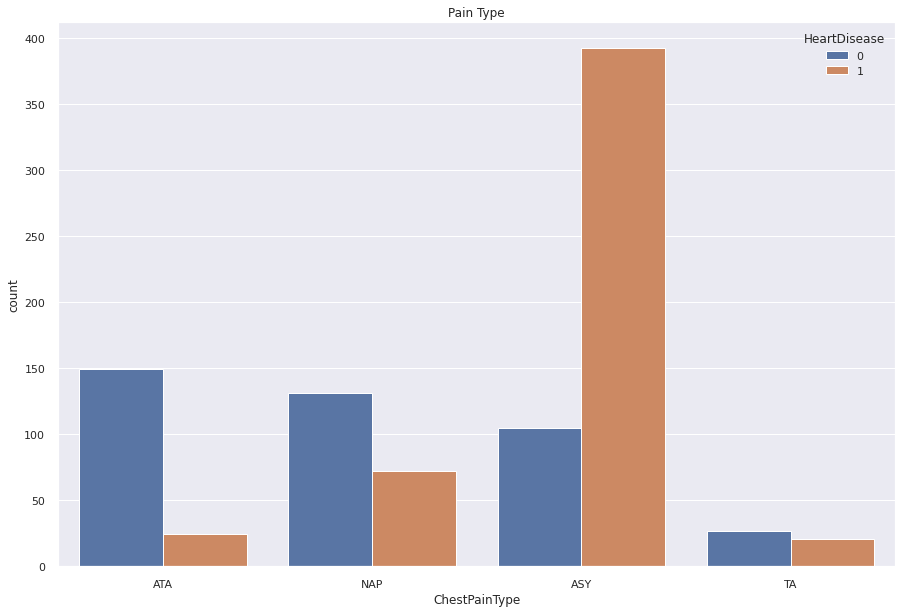

In [34]:
sns.countplot(data=df, x ='ChestPainType', hue='HeartDisease').set_title('Pain Type')

In [61]:
cholesterol_counter = df[df['Cholesterol'] != 0]

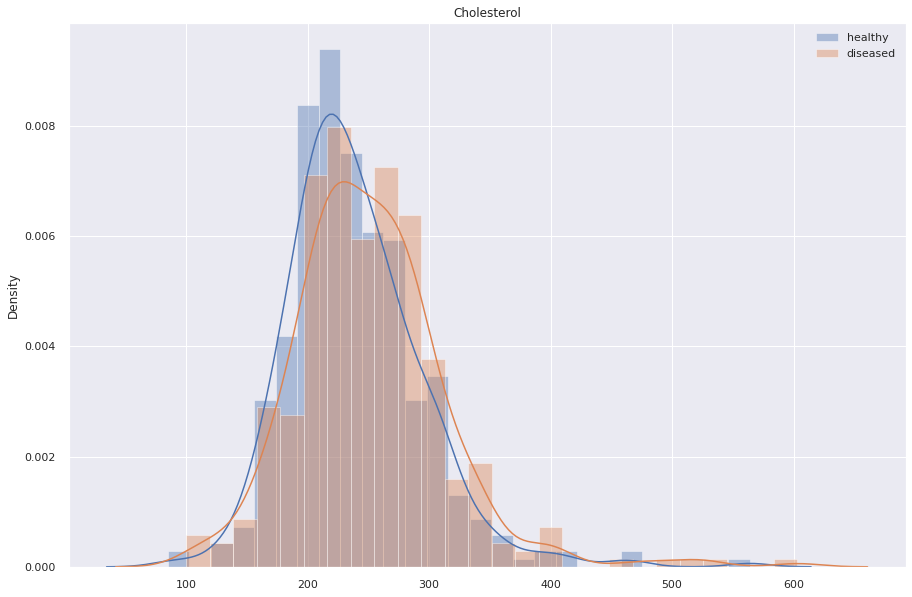

In [57]:
sns.distplot(x =cholesterol_counter.Cholesterol[cholesterol_counter['HeartDisease']==0],label='healthy').set_title('Cholesterol')
sns.distplot(x =cholesterol_counter.Cholesterol[cholesterol_counter['HeartDisease']==1], label='diseased').set_title('Cholesterol')
plt.legend()

Text(0.5, 1.0, 'ST_Slope')

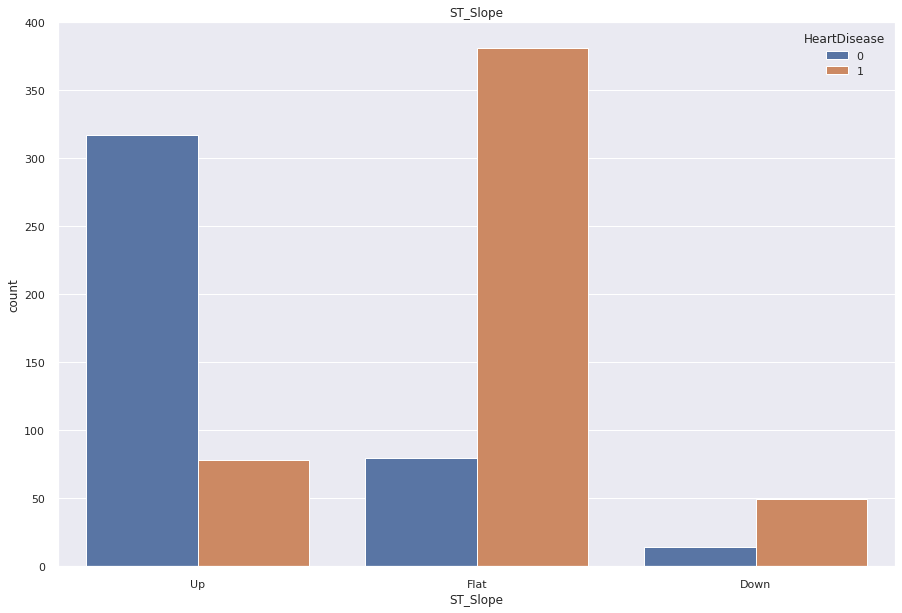

In [60]:
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease').set_title('ST_Slope')

Text(0.5, 1.0, 'Heart Disease')

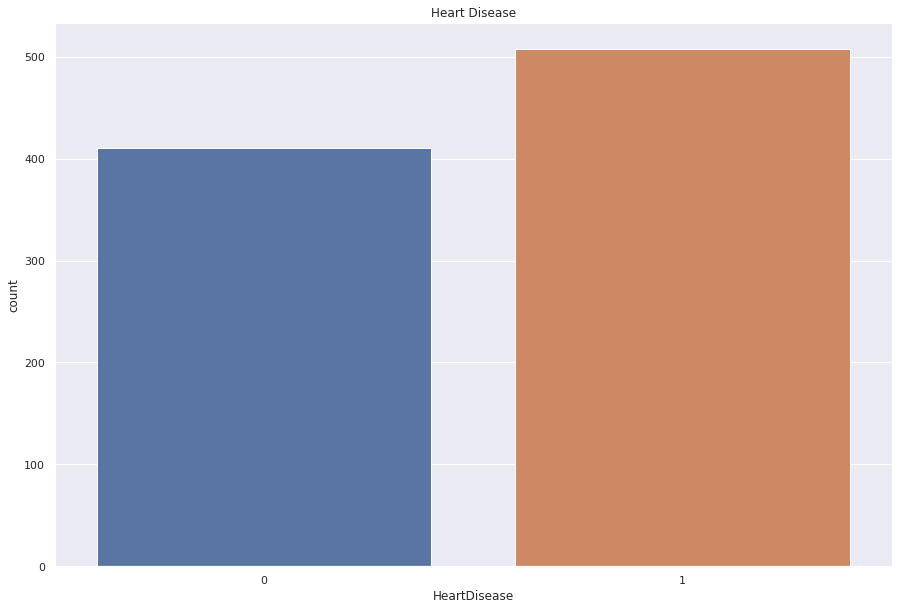

In [10]:
sns.countplot(data=df, x='HeartDisease').set_title("Heart Disease")

In [11]:
df.HeartDisease.value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

## Uploading data set

In [12]:
from pycaret.classification import *

In [14]:
data = setup(data = df, target='HeartDisease',
             categorical_features = ['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
             session_id=123)

,Description,Value
0,session_id,123
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(918, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare all Models

In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8675,0.0000,0.8919,0.8702,0.8800,0.7320,0.7341,0.0050
lda,Linear Discriminant Analysis,0.8660,0.9272,0.8919,0.8680,0.8788,0.7288,0.7311,0.0050
et,Extra Trees Classifier,0.8644,0.9210,0.8779,0.8764,0.8764,0.7263,0.7279,0.0760
nb,Naive Bayes,0.8597,0.9152,0.8692,0.8747,0.8710,0.7171,0.7188,0.0050
gbc,Gradient Boosting Classifier,0.8597,0.9171,0.8777,0.8681,0.8717,0.7168,0.7191,0.0330
rf,Random Forest Classifier,0.8582,0.9261,0.8921,0.8562,0.8726,0.7127,0.7161,0.0880
lr,Logistic Regression,0.8566,0.9253,0.8891,0.8554,0.8713,0.7095,0.7116,0.3100
lightgbm,Light Gradient Boosting Machine,0.8473,0.9156,0.8721,0.8540,0.8624,0.6908,0.6921,0.0180
ada,Ada Boost Classifier,0.8442,0.8994,0.8408,0.8711,0.8548,0.6867,0.6887,0.0290
dt,Decision Tree Classifier,0.7802,0.7788,0.7921,0.8052,0.7963,0.5573,0.5612,0.0050


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

I choose the <b>Random Forest Classifier</b> model due to the best recall and really good AUC.


Function <i>create_model</i> returns a table with k-fold cross validation scores and a train model object. Variable ‘randomForest’ stores a trained model object returned by create_model function is a scikit-learn estimator

In [16]:
randomForest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8615,0.9444,0.8333,0.9091,0.8696,0.7226,0.7257
1,0.8923,0.9397,0.9444,0.8718,0.9067,0.7799,0.7834
2,0.8281,0.8502,0.8857,0.8158,0.8493,0.6501,0.6531
3,0.9062,0.9675,0.9714,0.8718,0.9189,0.8086,0.8152
4,0.7969,0.8616,0.7714,0.8438,0.8060,0.5938,0.5964
5,0.8438,0.9596,0.8571,0.8571,0.8571,0.6847,0.6847
6,0.8906,0.9621,0.9714,0.8500,0.9067,0.7760,0.7861
7,0.8281,0.9158,0.8857,0.8158,0.8493,0.6501,0.6531
8,0.8438,0.9089,0.8857,0.8378,0.8611,0.6829,0.6842
9,0.8906,0.9517,0.9143,0.8889,0.9014,0.7787,0.7790


The <i>tune_model</i> function is used for automatically tuning hyperparameters of a machine learning model. PyCaret uses random grid search over a predefined search space. This function returns a table with k-fold cross validated scores and a trained model object.

In [17]:
tuned_randomForest = tune_model(randomForest)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8923,0.9473,0.8889,0.9143,0.9014,0.7828,0.7832
1,0.8769,0.9416,0.9444,0.8500,0.8947,0.7476,0.7536
2,0.8594,0.8631,0.9429,0.8250,0.8800,0.7120,0.7213
3,0.9062,0.9576,0.9429,0.8919,0.9167,0.8097,0.8113
4,0.7656,0.8581,0.7143,0.8333,0.7692,0.5340,0.5405
5,0.8594,0.9488,0.8571,0.8824,0.8696,0.7171,0.7174
6,0.8906,0.9537,0.9143,0.8889,0.9014,0.7787,0.7790
7,0.8438,0.9300,0.9143,0.8205,0.8649,0.6810,0.6866
8,0.8594,0.9429,0.9143,0.8421,0.8767,0.7137,0.7170
9,0.9219,0.9547,0.9714,0.8947,0.9315,0.8410,0.8448


In [30]:
print(tuned_randomForest)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


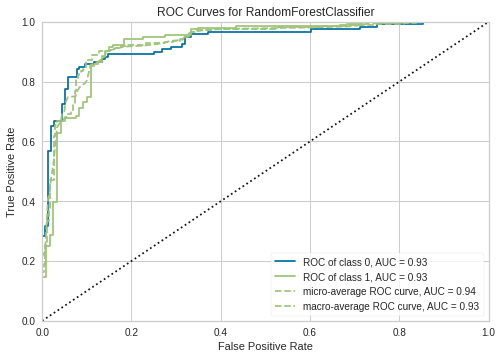

In [19]:
plot_model(tuned_randomForest, plot= 'auc')

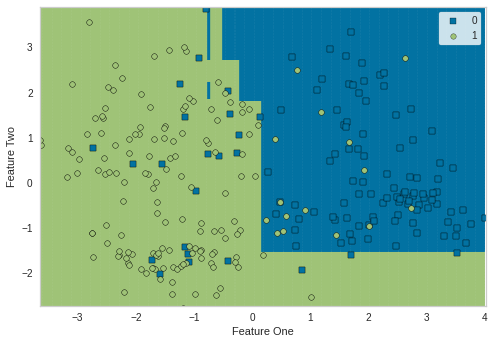

In [20]:
plot_model(tuned_randomForest, plot= 'boundary')

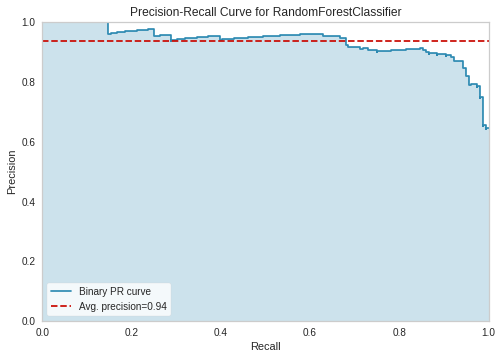

In [21]:
plot_model(tuned_randomForest, plot= 'pr')

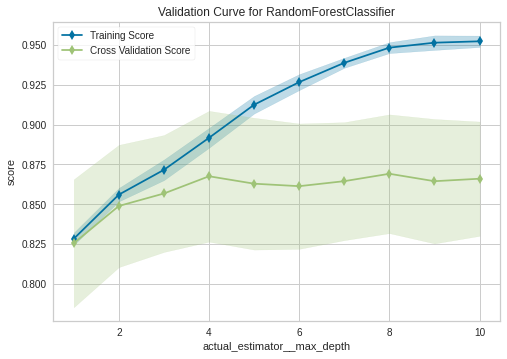

In [22]:
plot_model(tuned_randomForest, plot= 'vc')

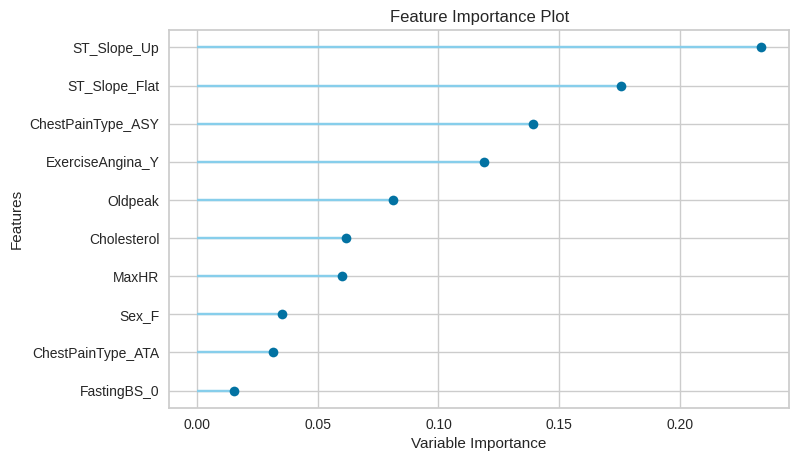

In [25]:
plot_model(tuned_randomForest, plot='feature')

### Confusion Matrix

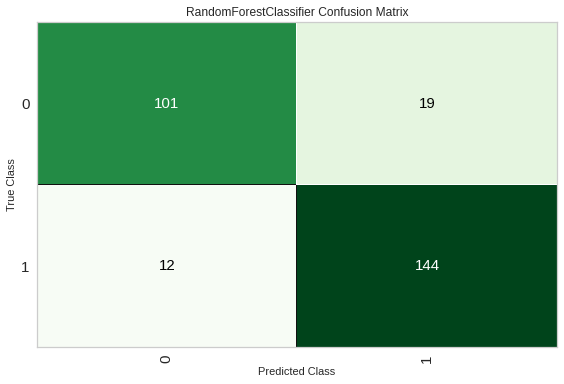

In [26]:
plot_model(tuned_randomForest, plot='confusion_matrix')

### Evaluate Model

In [23]:
evaluate_model(tuned_randomForest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Predict Test Data

In [29]:
predict_model(tuned_randomForest)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8877,0.9315,0.9231,0.8834,0.9028,0.7699,0.7710


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease,Label,Score
0,36.0,110.0,0.0,125.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0.9255
1,42.0,130.0,180.0,150.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9303
2,54.0,110.0,208.0,142.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9467
3,69.0,140.0,110.0,109.0,1.5,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0.9414
4,40.0,140.0,235.0,188.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,59.0,130.0,126.0,125.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8042
272,56.0,120.0,0.0,148.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.7970
273,38.0,120.0,275.0,129.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9558
274,39.0,130.0,215.0,120.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9408
